In [60]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

import re

import random
import pickle,pprint

%matplotlib inline

In [61]:
# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Dependence on  U_t

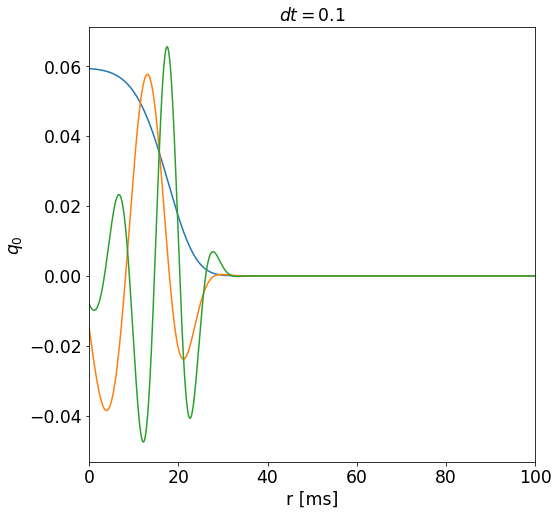

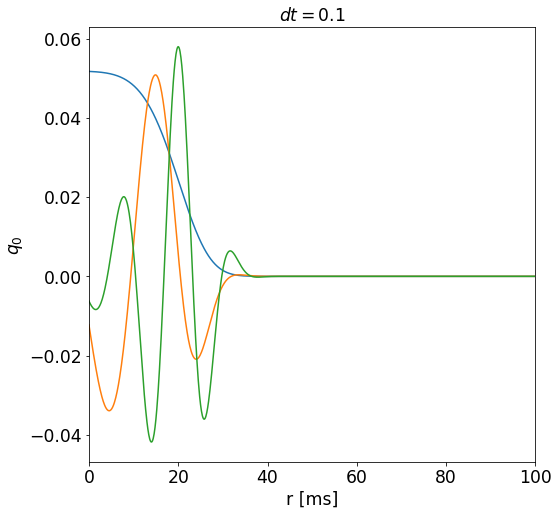

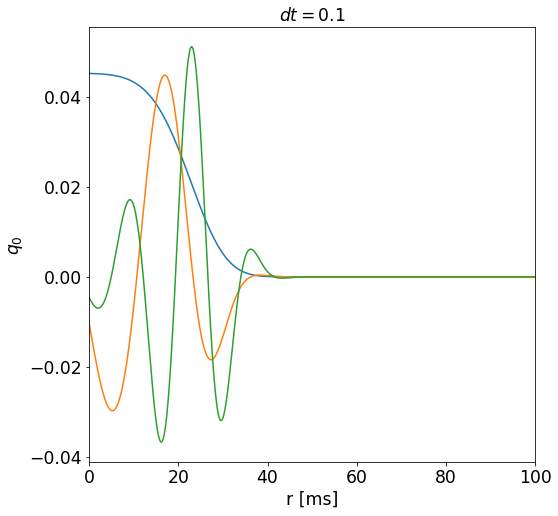

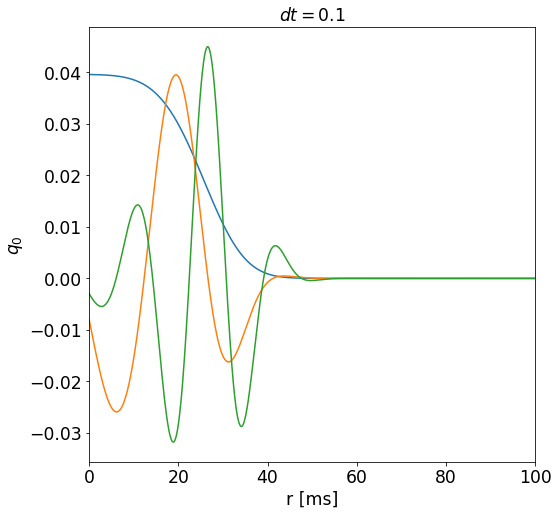

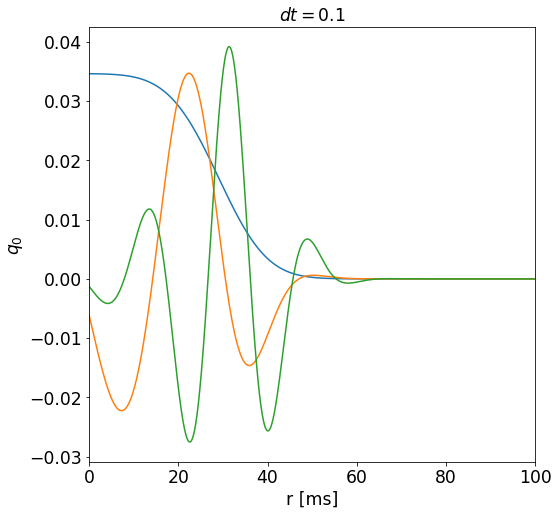

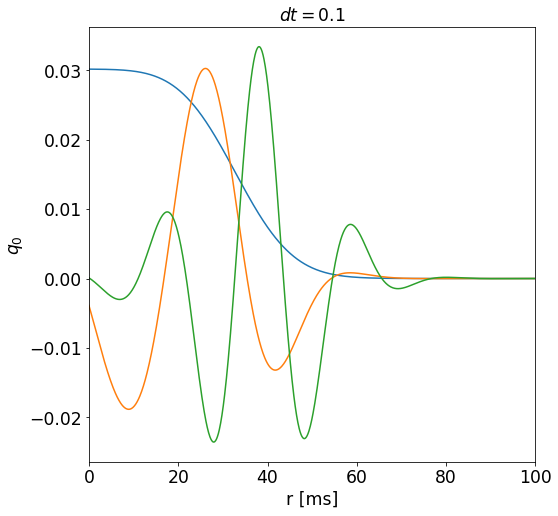

In [62]:
#Variable:
name='U_t'

t_window=100

my_list=[13,14,15,16,17,18]
U_t=15    # mV
D=2       # mV
C=1       # 10Hz-> 0.01ms^{-1}
dt=0.1      #  ms
tau=20    #  ms


v_0_list=[]
v_1_list=[]
v_2_list=[]
t_list=[]
eig_list=[]

my_eig=np.zeros((len(my_list),4))

for idx, my in enumerate(my_list):
    
    U_t=my

    N=int(t_window/dt)

    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))

    mu_=16
    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
    L=np.zeros((N+1,N+1))
    for i in range(N-1):
        L[0,i+1]=rho[i]*dt
        L[i+1,i+1]=-1-rho[i]*dt
        L[i+2,i+1]=1
        
    L[0,0]=-1
    L[1,0]=1
    L[0,N]=1
    L[N,N]=-1
    
    eigv, v = np.linalg.eig(L)
    
    eigv=eigv/dt
    
    eig_list.append(eigv)
    
    real_eigv=eigv.real
    
    x=np.sort(real_eigv)
    
    
    my_eig[idx,0]=x[-1]
    my_eig[idx,1]=x[-2]
    my_eig[idx,2]=x[-4]
  
      
    eig_0=np.where(eigv.real==x[-1])
    v_0=v[:,eig_0[0][0]].real
    
    if v_0[0]<0:
        v_0=-1*v_0
    
    eig_1=np.where(eigv.real==x[-2])
    v_1=v[:,eig_1[0][0]].real
    
    if np.max(v_1)!=np.max(abs(v_1)):
        v_1=-1*v_1
        
    
    eig_2=np.where(eigv.real==x[-4])
    v_2=v[:,eig_2[0][0]].real
    
    if np.max(v_2)!=np.max(abs(v_2)):
        v_2=-1*v_2
    
    t_=[j*dt for j in range(N+1)]
    

    
    plt.figure(figsize=(8,8))
   
    norm=np.sum(v_0)*dt
    plt.plot(t_,v_0/norm,label='$v_0$')
    plt.plot(t_,v_1/norm,label='$v_1$')
    plt.plot(t_,v_2/norm,label='$v_2$')
    
    
    v_0_list.append(v_0/norm)
    v_1_list.append(v_1/norm)
    v_2_list.append(v_2/norm)
    
    plt.xlim(0,100)
    plt.xlabel('r [ms]')
    plt.ylabel('$q_0$')
    plt.title('$dt=$'+str(dt))


In [63]:
spectrum = {'eig_list': eig_list,
            'my_eig': np.copy(my_eig),
            name+'_list':my_list,
            'v_0_list': v_0_list,
            'v_1_list': v_1_list,
            'v_2_list': v_2_list,
            't_':  t_
           }


output = open('sepctrum_varying_'+name+'.pkl', 'wb')

pickle.dump(spectrum , output)

output.close()

a1 [ -1.97191833  12.19339914]
a2 [-0.58353349  1.71547279]
a1 -0.507120392676 b/a -6.18352135874
a2 -1.71369770583 b/a -2.93980177935


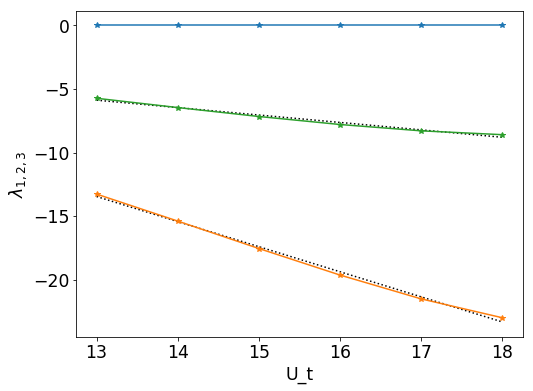

In [64]:
name='U_t'

pkl_file = open('sepctrum_varying_'+name+'.pkl', 'rb')

spectrum = pickle.load(pkl_file)

pkl_file.close()

my_eig=spectrum['my_eig']
my_list=spectrum[name+'_list']



plt.figure(figsize=(8,6))
a1=np.polyfit(my_list, 1/my_eig[:,1], 1)
a2=np.polyfit(my_list, 1/my_eig[:,2], 1)
print('a1',a1)
print('a2',a2)
print('a1',1/a1[0],'b/a',a1[1]/a1[0])
print('a2',1/a2[0],'b/a',a2[1]/a2[0])

p1 = np.poly1d(a1)
p2 = np.poly1d(a2)


plt.figure(figsize=(8,6))
plt.plot( my_list, my_eig[:,0],marker='*')
plt.plot( my_list, p1(my_list),c='k',ls=':')
plt.plot( my_list, p2(my_list),c='k',ls=':')
plt.plot( my_list, 1/my_eig[:,1],marker='*')
plt.plot( my_list, 1/my_eig[:,2],marker='*')

plt.xlabel(name)
plt.ylabel('$\lambda_{1,2,3}$')



## Dependence on D

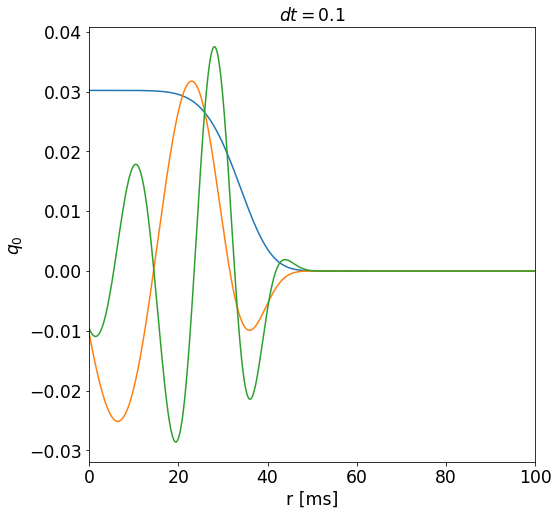

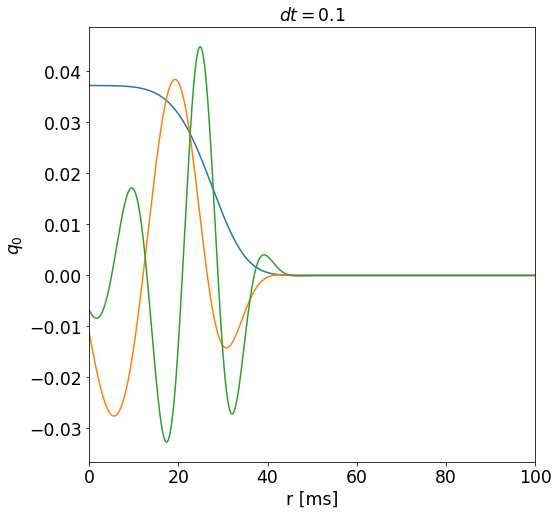

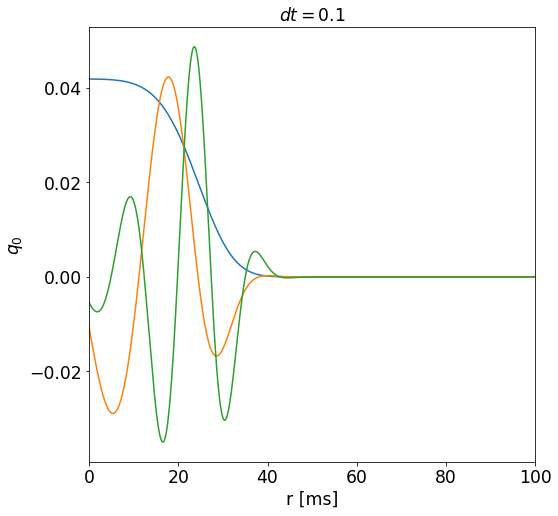

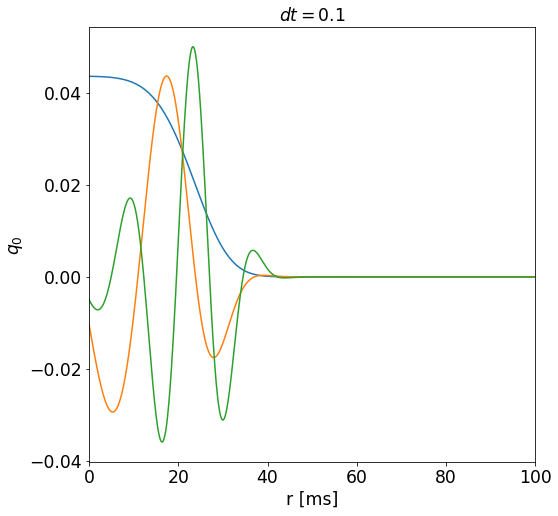

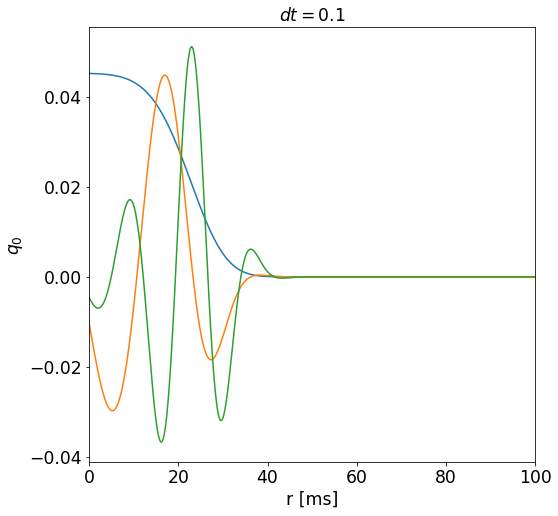

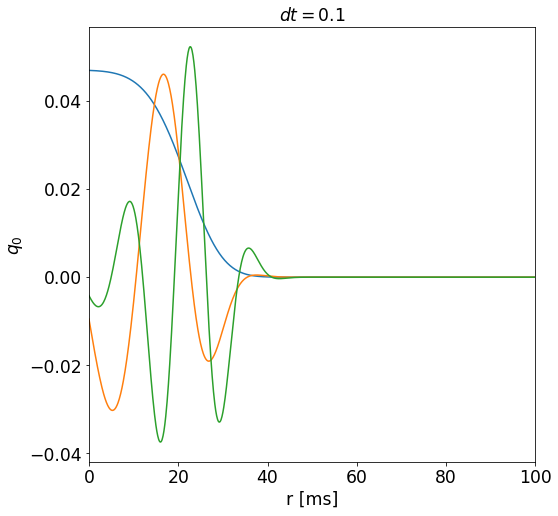

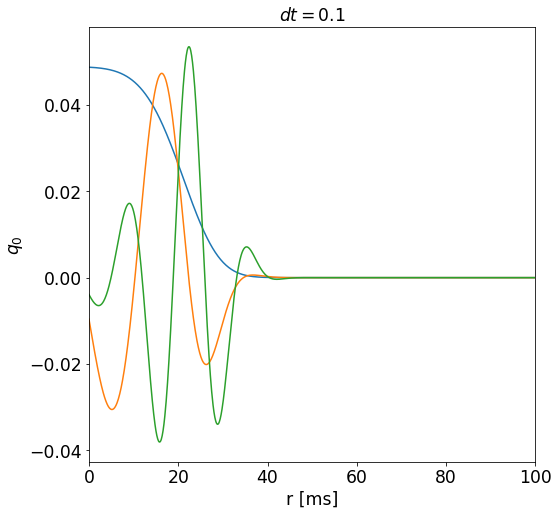

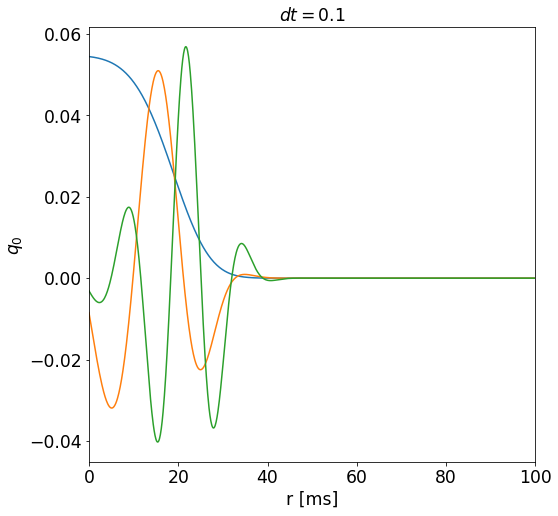

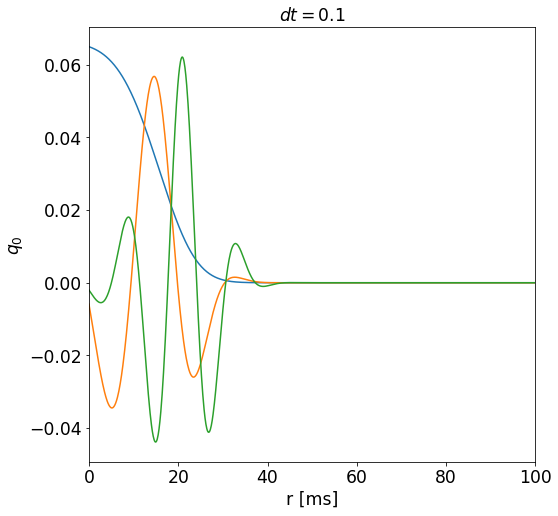

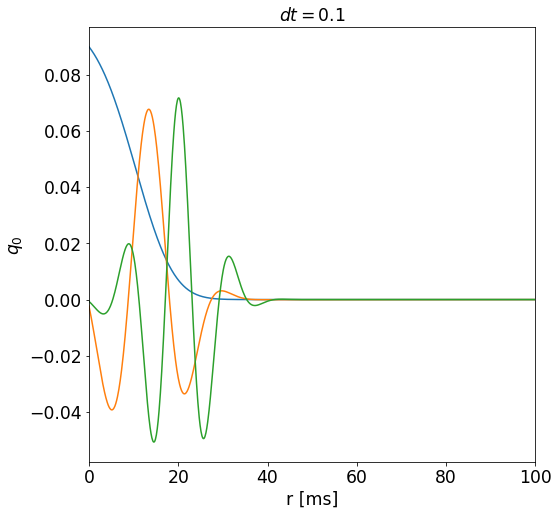

In [65]:
#Variable:
name='D'

t_window=100

my_list=[1,1.5,1.8,1.9,2,2.1,2.2,2.5,3,4]

U_t=15    # mV
D=2       # mV
C=1       # 10Hz-> 0.01ms^{-1}
dt=0.1      #  ms
tau=20    #  ms


v_0_list=[]
v_1_list=[]
v_2_list=[]
t_list=[]
eig_list=[]

my_eig=np.zeros((len(my_list),4))

for idx, my in enumerate(my_list):
    
    #to change
    D=my

    N=int(t_window/dt)

    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))

    mu_=16
    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
    L=np.zeros((N+1,N+1))
    for i in range(N-1):
        L[0,i+1]=rho[i]*dt
        L[i+1,i+1]=-1-rho[i]*dt
        L[i+2,i+1]=1
        
    L[0,0]=-1
    L[1,0]=1
    L[0,N]=1
    L[N,N]=-1
    
    eigv, v = np.linalg.eig(L)
    
    eigv=eigv/dt
    
    eig_list.append(eigv)
    
    real_eigv=eigv.real
    
    x=np.sort(real_eigv)
    
    
    my_eig[idx,0]=x[-1]
    my_eig[idx,1]=x[-2]
    my_eig[idx,2]=x[-4]
  
      
    eig_0=np.where(eigv.real==x[-1])
    v_0=v[:,eig_0[0][0]].real
    
    if v_0[0]<0:
        v_0=-1*v_0
    
    eig_1=np.where(eigv.real==x[-2])
    v_1=v[:,eig_1[0][0]].real
    
    if np.max(v_1)!=np.max(abs(v_1)):
        v_1=-1*v_1
        
    
    eig_2=np.where(eigv.real==x[-4])
    v_2=v[:,eig_2[0][0]].real
    
    if np.max(v_2)!=np.max(abs(v_2)):
        v_2=-1*v_2
    
    t_=[j*dt for j in range(N+1)]
    

    
    plt.figure(figsize=(8,8))
   
    norm=np.sum(v_0)*dt
    plt.plot(t_,v_0/norm,label='$v_0$')
    plt.plot(t_,v_1/norm,label='$v_1$')
    plt.plot(t_,v_2/norm,label='$v_2$')
    
    
    v_0_list.append(v_0/norm)
    v_1_list.append(v_1/norm)
    v_2_list.append(v_2/norm)
    
    plt.xlim(0,100)
    plt.xlabel('r [ms]')
    plt.ylabel('$q_0$')
    plt.title('$dt=$'+str(dt))


spectrum = {'eig_list': eig_list,
            'my_eig': np.copy(my_eig),
            name+'_list':my_list,
            'v_0_list': v_0_list,
            'v_1_list': v_1_list,
            'v_2_list': v_2_list,
            't_':  t_
           }


output = open('sepctrum_varying_'+name+'.pkl', 'wb')

pickle.dump(spectrum , output)

output.close()




a1 [-0.05198365  0.04380135]
a2 [-0.08449788  0.02805163]
a1 -0.0519836487281 a2 -0.0844978797038 a2/a1 1.62547035022


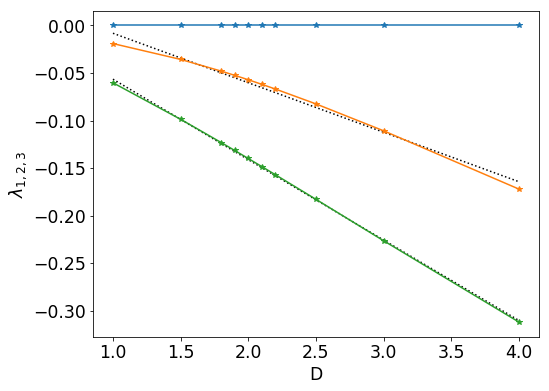

In [66]:
name='D'

pkl_file = open('sepctrum_varying_'+name+'.pkl', 'rb')

spectrum = pickle.load(pkl_file)

pkl_file.close()

my_eig=spectrum['my_eig']
my_list=spectrum[name+'_list']

a1=np.polyfit(my_list, my_eig[:,1], 1)
a2=np.polyfit(my_list, my_eig[:,2], 1)
print('a1',a1)
print('a2',a2)
print('a1',a1[0],'a2',a2[0],'a2/a1',a2[0]/a1[0])


p1 = np.poly1d(a1)
p2 = np.poly1d(a2)

plt.figure(figsize=(8,6))
plt.plot( my_list, my_eig[:,0],marker='*')
plt.plot( my_list, p1(my_list),c='k',ls=':')
plt.plot( my_list, p2(my_list),c='k',ls=':')
plt.plot( my_list, my_eig[:,1],marker='*')
plt.plot( my_list, my_eig[:,2],marker='*')
plt.xlabel(name)
plt.ylabel('$\lambda_{1,2,3}$')




## Dependence on mu_

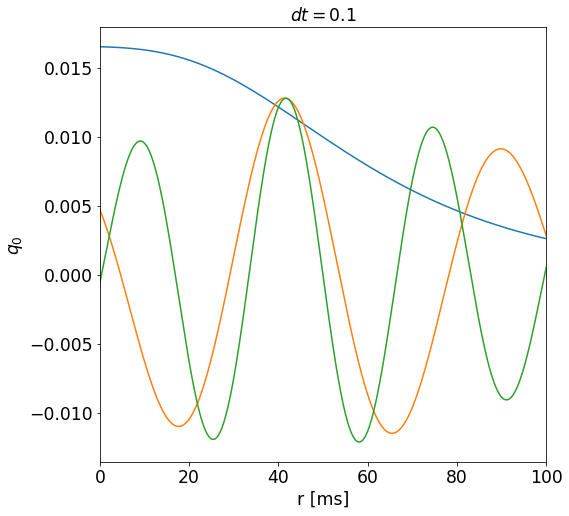

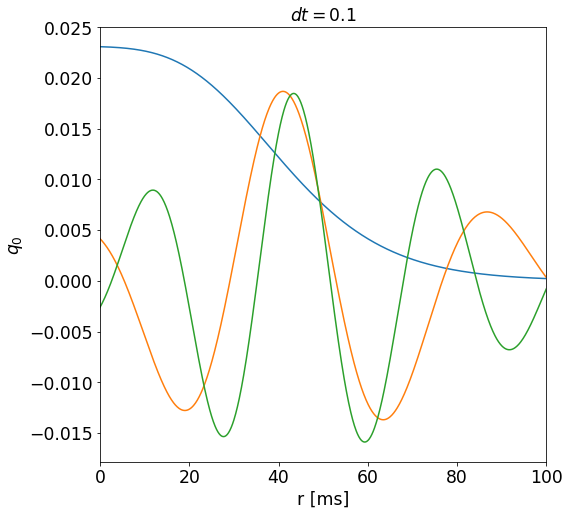

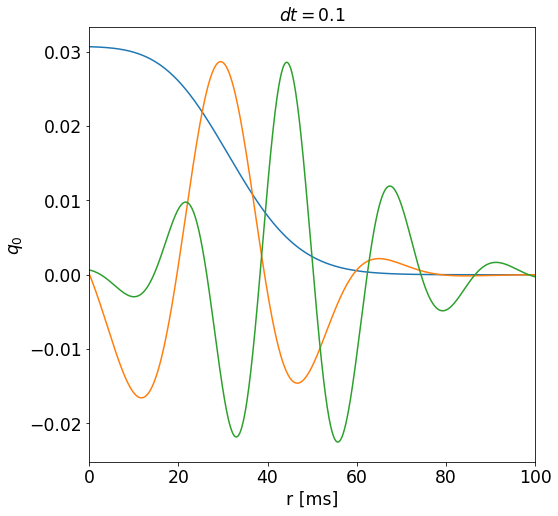

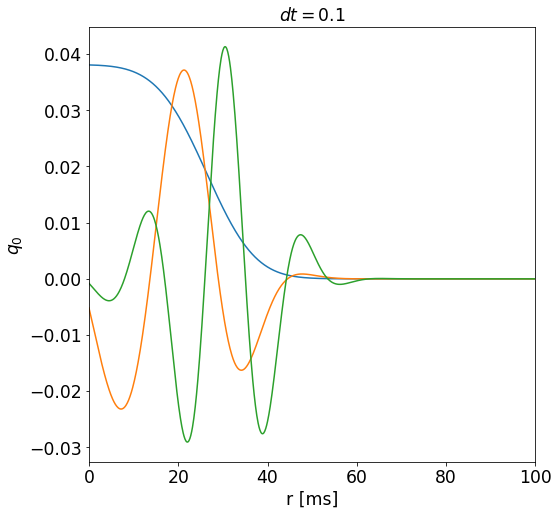

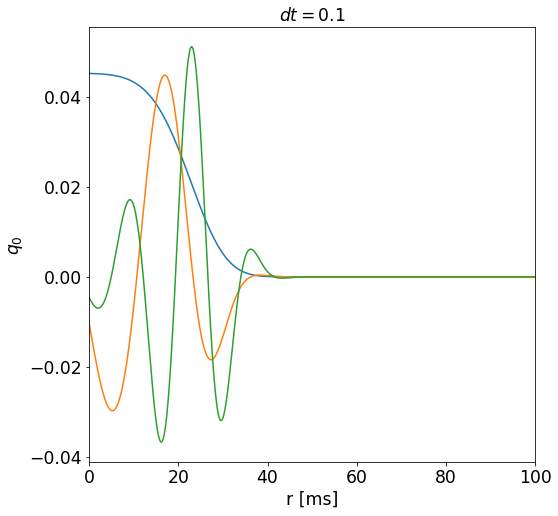

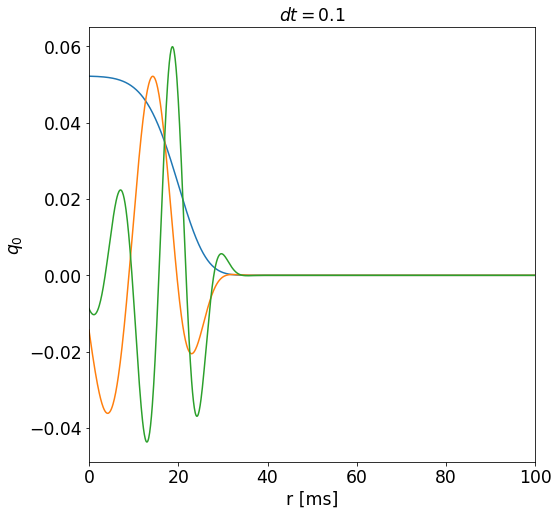

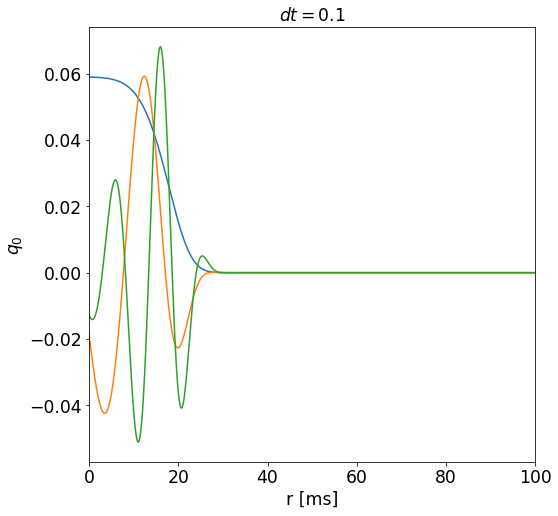

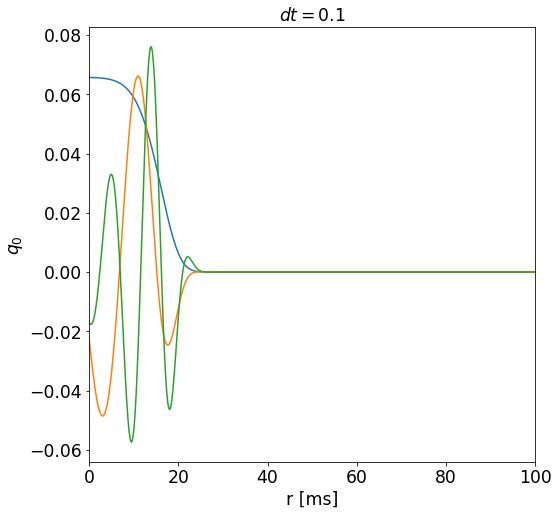

In [67]:
#Variable:
name='mu'

t_window=100

my_list=[8,10,12,14,16,18,20,22]

U_t=15    # mV
D=2       # mV
C=1       # 10Hz-> 0.01ms^{-1}
dt=0.1      #  ms
tau=20    #  ms


v_0_list=[]
v_1_list=[]
v_2_list=[]
t_list=[]
eig_list=[]

my_eig=np.zeros((len(my_list),4))

for idx, my in enumerate(my_list):
    
    #to change
    mu_=my

    N=int(t_window/dt)

    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))


    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
    L=np.zeros((N+1,N+1))
    for i in range(N-1):
        L[0,i+1]=rho[i]*dt
        L[i+1,i+1]=-1-rho[i]*dt
        L[i+2,i+1]=1
        
    L[0,0]=-1
    L[1,0]=1
    L[0,N]=1
    L[N,N]=-1
    
    eigv, v = np.linalg.eig(L)
    
    eigv=eigv/dt
    
    eig_list.append(eigv)
    
    real_eigv=eigv.real
    
    x=np.sort(real_eigv)
    
    
    my_eig[idx,0]=x[-1]
    my_eig[idx,1]=x[-2]
    my_eig[idx,2]=x[-4]
  
      
    eig_0=np.where(eigv.real==x[-1])
    v_0=v[:,eig_0[0][0]].real
    
    if v_0[0]<0:
        v_0=-1*v_0
    
    eig_1=np.where(eigv.real==x[-2])
    v_1=v[:,eig_1[0][0]].real
    
    if np.max(v_1)!=np.max(abs(v_1)):
        v_1=-1*v_1
        
    
    eig_2=np.where(eigv.real==x[-4])
    v_2=v[:,eig_2[0][0]].real
    
    if np.max(v_2)!=np.max(abs(v_2)):
        v_2=-1*v_2
    
    t_=[j*dt for j in range(N+1)]
    

    
    plt.figure(figsize=(8,8))
   
    norm=np.sum(v_0)*dt
    plt.plot(t_,v_0/norm,label='$v_0$')
    plt.plot(t_,v_1/norm,label='$v_1$')
    plt.plot(t_,v_2/norm,label='$v_2$')
    
    
    v_0_list.append(v_0/norm)
    v_1_list.append(v_1/norm)
    v_2_list.append(v_2/norm)
    
    plt.xlim(0,100)
    plt.xlabel('r [ms]')
    plt.ylabel('$q_0$')
    plt.title('$dt=$'+str(dt))


spectrum = {'eig_list': eig_list,
            'my_eig': np.copy(my_eig),
            name+'_list':my_list,
            'v_0_list': v_0_list,
            'v_1_list': v_1_list,
            'v_2_list': v_2_list,
            't_':  t_
           }

output = open('sepctrum_varying_'+name+'.pkl', 'wb')

pickle.dump(spectrum , output)

output.close()




a1 [-0.00239535 -0.01637239]
a2 [-0.00941845  0.02567254]
a1 -0.00239535377665 a2 -0.00941844767883 a2/a1 3.93196519472


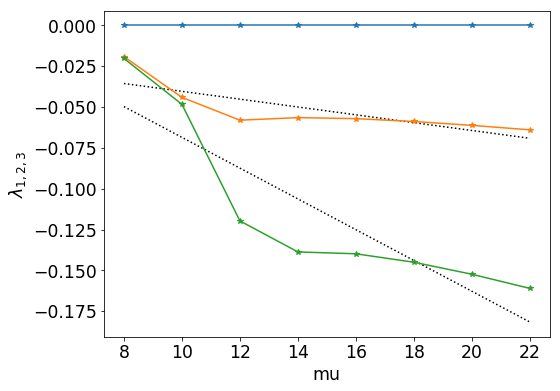

In [ ]:
name='mu'

pkl_file = open('sepctrum_varying_'+name+'.pkl', 'rb')

spectrum = pickle.load(pkl_file)

pkl_file.close()

my_eig=spectrum['my_eig']
my_list=spectrum[name+'_list']

a1=np.polyfit(my_list, my_eig[:,1], 1)
a2=np.polyfit(my_list, my_eig[:,2], 1)
print('a1',a1)
print('a2',a2)
print('a1',a1[0],'a2',a2[0],'a2/a1',a2[0]/a1[0])


p1 = np.poly1d(a1)
p2 = np.poly1d(a2)

plt.figure(figsize=(8,6))
plt.plot( my_list, my_eig[:,0],marker='*')
plt.plot( my_list, p1(my_list),c='k',ls=':')
plt.plot( my_list, p2(my_list),c='k',ls=':')
plt.plot( my_list, my_eig[:,1],marker='*')
plt.plot( my_list, my_eig[:,2],marker='*')
plt.xlabel(name)
plt.ylabel('$\lambda_{1,2,3}$')

## dependance on C

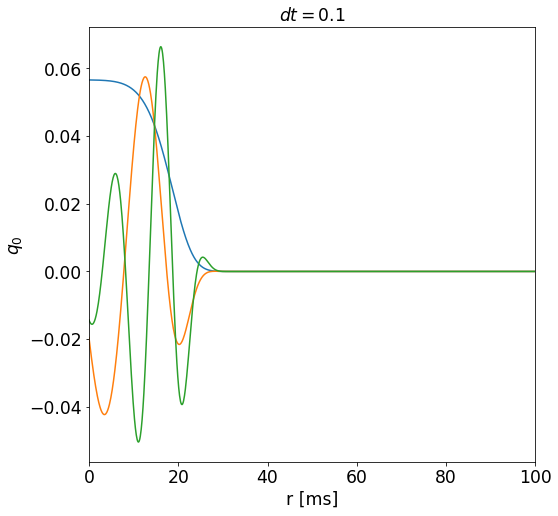

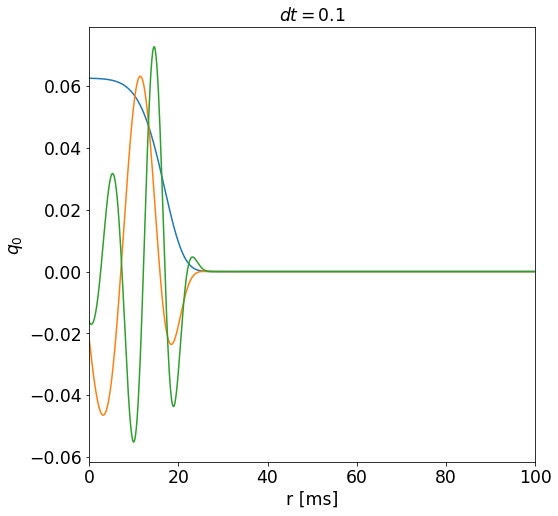

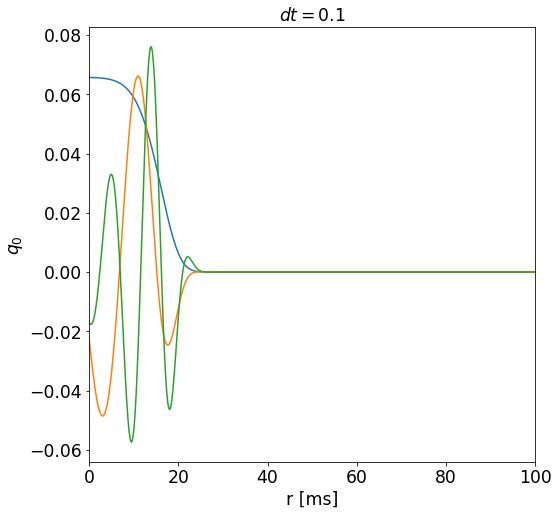

In [ ]:

#Variable:
name='C'

t_window=100

my_list=[0.5,0.8,1,1.2,1.5,2,3,4]

U_t=15    # mV
D=2       # mV
C=1       # 10Hz-> 0.01ms^{-1}
dt=0.1      #  ms
tau=20    #  ms


v_0_list=[]
v_1_list=[]
v_2_list=[]
t_list=[]
eig_list=[]

my_eig=np.zeros((len(my_list),4))

for idx, my in enumerate(my_list):
    
    #to change
    C=my

    N=int(t_window/dt)

    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))


    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
    L=np.zeros((N+1,N+1))
    for i in range(N-1):
        L[0,i+1]=rho[i]*dt
        L[i+1,i+1]=-1-rho[i]*dt
        L[i+2,i+1]=1
        
    L[0,0]=-1
    L[1,0]=1
    L[0,N]=1
    L[N,N]=-1
    
    eigv, v = np.linalg.eig(L)
    
    eigv=eigv/dt
    
    eig_list.append(eigv)
    
    real_eigv=eigv.real
    
    x=np.sort(real_eigv)
    
    
    my_eig[idx,0]=x[-1]
    my_eig[idx,1]=x[-2]
    my_eig[idx,2]=x[-4]
  
      
    eig_0=np.where(eigv.real==x[-1])
    v_0=v[:,eig_0[0][0]].real
    
    if v_0[0]<0:
        v_0=-1*v_0
    
    eig_1=np.where(eigv.real==x[-2])
    v_1=v[:,eig_1[0][0]].real
    
    if np.max(v_1)!=np.max(abs(v_1)):
        v_1=-1*v_1
        
    
    eig_2=np.where(eigv.real==x[-4])
    v_2=v[:,eig_2[0][0]].real
    
    if np.max(v_2)!=np.max(abs(v_2)):
        v_2=-1*v_2
    
    t_=[j*dt for j in range(N+1)]
    

    
    plt.figure(figsize=(8,8))
   
    norm=np.sum(v_0)*dt
    plt.plot(t_,v_0/norm,label='$v_0$')
    plt.plot(t_,v_1/norm,label='$v_1$')
    plt.plot(t_,v_2/norm,label='$v_2$')
    
    
    v_0_list.append(v_0/norm)
    v_1_list.append(v_1/norm)
    v_2_list.append(v_2/norm)
    
    plt.xlim(0,100)
    plt.xlabel('r [ms]')
    plt.ylabel('$q_0$')
    plt.title('$dt=$'+str(dt))


spectrum = {'eig_list': eig_list,
            'my_eig': np.copy(my_eig),
            name+'_list':my_list,
            'v_0_list': v_0_list,
            'v_1_list': v_1_list,
            'v_2_list': v_2_list,
            't_':  t_
           }

output = open('sepctrum_varying_'+name+'.pkl', 'wb')

pickle.dump(spectrum , output)

output.close()




In [ ]:
name='C'

pkl_file = open('sepctrum_varying_'+name+'.pkl', 'rb')

spectrum = pickle.load(pkl_file)

pkl_file.close()

my_eig=spectrum['my_eig']
my_list=spectrum[name+'_list']

a1=np.polyfit(my_list, my_eig[:,1], 1)
a2=np.polyfit(my_list, my_eig[:,2], 1)
print('a1',a1)
print('a2',a2)
print('a1',a1[0],'a2',a2[0],'a2/a1',a2[0]/a1[0])


p1 = np.poly1d(a1)
p2 = np.poly1d(a2)

plt.figure(figsize=(8,6))
plt.plot( my_list, my_eig[:,0],marker='*')
plt.plot( my_list, p1(my_list),c='k',ls=':')
plt.plot( my_list, p2(my_list),c='k',ls=':')
plt.plot( my_list, my_eig[:,1],marker='*')
plt.plot( my_list, my_eig[:,2],marker='*')
plt.xlabel(name)
plt.ylabel('$\lambda_{1,2,3}$')

## dependance on $\tau$

In [ ]:

#Variable:
name='tau'
my_list=[10,15,18,20,22,25,30,35]

t_window=100

U_t=15    # mV
D=2       # mV
C=1       # 10Hz-> 0.01ms^{-1}
dt=0.1      #  ms
tau=20    #  ms


v_0_list=[]
v_1_list=[]
v_2_list=[]
t_list=[]
eig_list=[]

my_eig=np.zeros((len(my_list),4))

for idx, my in enumerate(my_list):
    
    #to change
    tau=my

    N=int(t_window/dt)

    ur=np.zeros((N+1,1))
    rho=np.zeros((N,1))


    for r in range(N):
        ur[r+1] = ur[r] * (1 - dt / tau)   + mu_*dt / tau
        rho[r] = C * np.exp((ur[r] - U_t) / D)
    L=np.zeros((N+1,N+1))
    for i in range(N-1):
        L[0,i+1]=rho[i]*dt
        L[i+1,i+1]=-1-rho[i]*dt
        L[i+2,i+1]=1
        
    L[0,0]=-1
    L[1,0]=1
    L[0,N]=1
    L[N,N]=-1
    
    eigv, v = np.linalg.eig(L)
    
    eigv=eigv/dt
    
    eig_list.append(eigv)
    
    real_eigv=eigv.real
    
    x=np.sort(real_eigv)
    
    
    my_eig[idx,0]=x[-1]
    my_eig[idx,1]=x[-2]
    my_eig[idx,2]=x[-4]
  
      
    eig_0=np.where(eigv.real==x[-1])
    v_0=v[:,eig_0[0][0]].real
    
    if v_0[0]<0:
        v_0=-1*v_0
    
    eig_1=np.where(eigv.real==x[-2])
    v_1=v[:,eig_1[0][0]].real
    
    if np.max(v_1)!=np.max(abs(v_1)):
        v_1=-1*v_1
        
    
    eig_2=np.where(eigv.real==x[-4])
    v_2=v[:,eig_2[0][0]].real
    
    if np.max(v_2)!=np.max(abs(v_2)):
        v_2=-1*v_2
    
    t_=[j*dt for j in range(N+1)]
    

    
    plt.figure(figsize=(8,8))
   
    norm=np.sum(v_0)*dt
    plt.plot(t_,v_0/norm,label='$v_0$')
    plt.plot(t_,v_1/norm,label='$v_1$')
    plt.plot(t_,v_2/norm,label='$v_2$')
    
    
    v_0_list.append(v_0/norm)
    v_1_list.append(v_1/norm)
    v_2_list.append(v_2/norm)
    
    plt.xlim(0,100)
    plt.xlabel('r [ms]')
    plt.ylabel('$q_0$')
    plt.title('$dt=$'+str(dt))


spectrum = {'eig_list': eig_list,
            'my_eig':my_eig,
            name+'_list':my_list,
            'v_0_list': v_0_list,
            'v_1_list': v_1_list,
            'v_2_list': v_2_list,
            't_':  v_2_list
           }


output = open('sepctrum_varying_'+name+'.pkl', 'wb')

pickle.dump(spectrum , output)

output.close()




In [ ]:
name='tau'
pkl_file = open('sepctrum_varying_'+name+'.pkl', 'rb')

spectrum = pickle.load(pkl_file)

pkl_file.close()

my_eig=spectrum['my_eig']
my_list=spectrum[name+'_list']



a1=np.polyfit(my_list, 1/my_eig[:,1], 1)
a2=np.polyfit(my_list, 1/my_eig[:,2], 1)
print('a1',a1)
print('a2',a2)
print('a1',1/a1[0],'b/a',a1[1]/a1[0])
print('a2',1/a2[0],'b/a',a2[1]/a2[0])

p1 = np.poly1d(a1)
p2 = np.poly1d(a2)


plt.figure(figsize=(8,6))
plt.plot( my_list, my_eig[:,0],marker='*')
plt.plot( my_list, p1(my_list),c='k',ls=':')
plt.plot( my_list, p2(my_list),c='k',ls=':')
plt.plot( my_list, 1/my_eig[:,1],marker='*')
plt.plot( my_list, 1/my_eig[:,2],marker='*')

plt.xlabel(name)
plt.ylabel('$\lambda_{1,2,3}$')




In [ ]:
U_t=15    # mV
D=2       # mV
C=1       # 10Hz-> 0.01ms^{-1}
dt=0.1      #  ms
tau=20    #  ms


k1=a1*(tau+6.8)*(U_t-6.2)/(C*D)
k2=a1*(tau+4.4)*(U_t-3)/(C*D)
print(k1,k2)

In [ ]:
#Ut
k1=0.5*(tau+6.8)/(C*D)
k2=1.7*(tau+4.4)/(C*D)
print(k1,k2,k2/k1)

In [ ]:
#D
k1=0.05*(tau+6.8)*(U_t-6.2)/(C)
k2=0.08*(tau+4.4)*(U_t-3)/(C)
print(k1,k2,k2/k1)

In [ ]:
#C
k1=0.02*(tau+6.8)*(U_t-6.2)/(D)
k2=0.04*(tau+4.4)*(U_t-3)/(D)
print(k1,k2,k2/k1)

In [ ]:
#tau
k1=1.7*(U_t-6.2)/(C*D)
k2=3.9*(U_t-3)/(C*D)
print(k1,k2,k2/k1)